# The residuals plot in the paper.

In [1]:
%matplotlib inline

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import gridspec

plotpar = {'axes.labelsize': 16,
           'font.size': 22,
           'legend.fontsize': 15,
           'xtick.labelsize': 10,
           'ytick.labelsize': 10,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load the data file.

In [3]:
df = pd.read_csv("../kepler_kinematics/gaia_kepler_lamost.csv")

/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,20,21,22,28,30,54,55,56,74,76,155,156,176) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Load the results file.

In [4]:
results = pd.read_csv("../data/all_kepler.csv")

In [5]:
results

,Unnamed: 0,Unnamed: 0.1,kepid,vx_inferred,vx_inferred_errp,vx_inferred_errm,vx_inferred_err,vy_inferred,vy_inferred_errp,vy_inferred_errm,vy_inferred_err,vz_inferred,vz_inferred_errp,vz_inferred_errm,vz_inferred_err,lndistance_inferred,lndistance_inferred_errp,lndistance_inferred_errm,lndistance_inferred_err
0,0,0,8409983,64.458294,5.321986,5.141641,5.275274,235.690475,16.581453,15.995689,16.586159,-20.300676,6.205794,5.911932,6.157923,0.631015,0.040052,0.039160,0.039426
1,0,0,8620063,90.909040,7.156614,6.518892,6.926392,203.102979,17.963499,17.305404,17.614451,34.994470,5.012412,4.887167,5.025488,0.935255,0.062923,0.063407,0.063791
2,0,0,6520965,18.317819,5.014651,5.023981,5.114347,211.281614,17.661098,18.095792,18.053738,30.998703,3.985803,4.018388,4.085542,0.710809,0.037666,0.035150,0.036154
3,0,0,2140561,20.606541,7.083685,6.966482,7.208582,218.159555,17.359744,17.300162,17.575455,11.119363,4.648618,4.606540,4.761686,1.208548,0.095697,0.087543,0.095331
4,0,0,9764544,19.822081,3.785470,3.894076,3.853967,229.763564,17.604370,17.956368,17.851068,-2.010314,4.957307,5.068530,5.012541,-1.460160,0.009560,0.009101,0.009306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918,0,0,8288405,-12.796338,4.533724,4.689296,4.615532,240.537159,16.962161,17.646409,17.308358,-16.704942,4.909024,5.115028,5.019020,-1.886944,0.003092,0.003202,0.003174
5919,0,0,10337695,112.398986,8.817894,8.047400,8.557111,218.390981,18.332667,17.418135,17.591338,2.532863,4.828802,4.535679,4.644928,1.347497,0.076129,0.071649,0.074656
5920,0,0,1865663,-40.389001,6.862570,6.729750,6.751646,232.389006,18.667075,18.313978,18.381954,2.100394,3.627875,3.545668,3.558813,-1.351188,0.004162,0.004513,0.004421
5921,0,0,7678547,-11.506060,4.776060,4.527742,4.820466,227.684168,18.174838,16.541662,18.027257,-6.634717,4.365523,4.041304,4.379220,0.198216,0.029834,0.028092,0.029489


Merge the results file and the data file.

In [6]:
adf = pd.merge(df, results, on="kepid", how="right")

In [14]:
def resid_plot(vx, vy, vz, vx_inferred, vy_inferred, vz_inferred, vx_inferred_err, vy_inferred_err, vz_inferred_err,
               r_est, lndistance_inferred,
               ms=2, alpha=.1, box_size=150):

    fig = plt.figure(figsize=(16, 6), dpi=200)
#     gs = gridspec.GridSpec(2, 3, hspace=.0, wspace=.3, height_ratios=[1, 1])
    gs = gridspec.GridSpec(2, 4, hspace=.0, wspace=.4, height_ratios=[1, 1])

    ax0 = plt.subplot(gs[0, 0])
    xlims = (np.median(vx) - box_size, np.median(vx_inferred) + box_size)
    ax0.plot(vx, vx_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(xlims[0], xlims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax0.set_ylim(xlims)
    ax0.set_xlim(xlims)
    ax0.set_ylabel("$\mathrm{V_x~inferred~[kms^{-1}]}$")
    ax0.set_xticklabels([])

    ax1 = plt.subplot(gs[0, 1])
    ylims = (np.median(vy) - box_size, np.median(vy_inferred) + box_size)
    ax1.plot(vy, vy_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(ylims[0], ylims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax1.set_xlim(ylims)
    ax1.set_ylim(ylims)
    ax1.set_ylabel("$\mathrm{V_y~inferred~[kms^{-1}]}$")
    ax1.set_xticklabels([])

    ax2 = plt.subplot(gs[0, 2])
    zlims = (np.median(vz) - box_size, np.median(vz_inferred) + box_size)
    ax2.plot(vz, vz_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(zlims[0], zlims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax2.set_xlim(zlims)
    ax2.set_ylim(zlims)
    ax2.set_ylabel("$\mathrm{V_z~inferred~[kms^{-1}]}$");
    ax2.set_xticklabels([])

    ax6 = plt.subplot(gs[0, 3])
    ax6.plot(r_est, lndistance_inferred, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(min(lndistance_inferred), max(lndistance_inferred), 100)
    ax6.plot(xs, xs, "k", ls="--", zorder=1)
    
    # Residual panels
    # ---------------------------------------------------------------------------------------------------
    
    ax3 = plt.subplot(gs[1, 0])
    ax3.plot(vx, vx_inferred - vx, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax3.errorbar(np.median(vx - 40), -30, yerr=np.median(vx_inferred_err), fmt="k.", label="$\mathrm{Typical~uncertainty}$")
    ax3.axhline(0, color="k", ls="--", zorder=1)
    ax3.set_ylim(-box_size, box_size)
    ax3.set_xlim(xlims)
    ax3.set_xlabel("$\mathrm{V_x~true~[kms^{-1}]}$")
    ax3.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")
    ax3.legend()

    ax4 = plt.subplot(gs[1, 1])
    ax4.plot(vy, vy_inferred - vy, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax4.errorbar(np.median(vy - 40), -30, yerr=np.median(vy_inferred_err), fmt="k.")
    ax4.axhline(0, color="k", ls="--", zorder=1)
    ax4.set_ylim(-box_size, box_size)
    ax4.set_xlim(ylims)
    ax4.set_xlabel("$\mathrm{V_y~true~[ks^{-1}]}$")
    ax4.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")

    ax5 = plt.subplot(gs[1, 2])
    ax5.plot(vz, vz_inferred - vz, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax5.errorbar(np.median(vz - 40), -30, yerr=np.median(vz_inferred_err), fmt="k.")
    print("typical vz uncertainty = ", np.median(vz_inferred_err), np.median(vz_inferred_err/vz)*100)
    ax5.axhline(0, color="k", ls="--", zorder=1)
    ax5.set_ylim(-box_size, box_size)
    ax5.set_xlim(zlims)
    ax5.set_xlabel("$\mathrm{V_z~true~[ks^{-1}]}$")
    ax5.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")

    ax6 = plt.subplot(gs[1, 3])
    ax6.plot(r_est, lndistance_inferred-r_est, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax6.axhline(0, color="k", ls="--", zorder=1)
    ax6.set_ylim(-.5, .5)
        
    return fig

In [8]:
adf.r_est.values[:10], np.exp(adf.lndistance_inferred.values[:10])*1e3

(array([ 349.20002016,  545.4509268 , 1180.83756535, 1178.93700466,
        2200.95619215, 1916.49166685, 3165.83564499, 2467.62477095,
         573.09538574,  256.10008214]),
 array([ 352.80383896,  554.29558761, 1217.64917757, 1220.30963027,
        2231.13449463, 2025.97439803, 3325.28129104, 2573.40489873,
         582.99143875,  258.10323714]))

typical vz uncertainty =  5.0001025417474745 6.990067124966871


/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  import sys


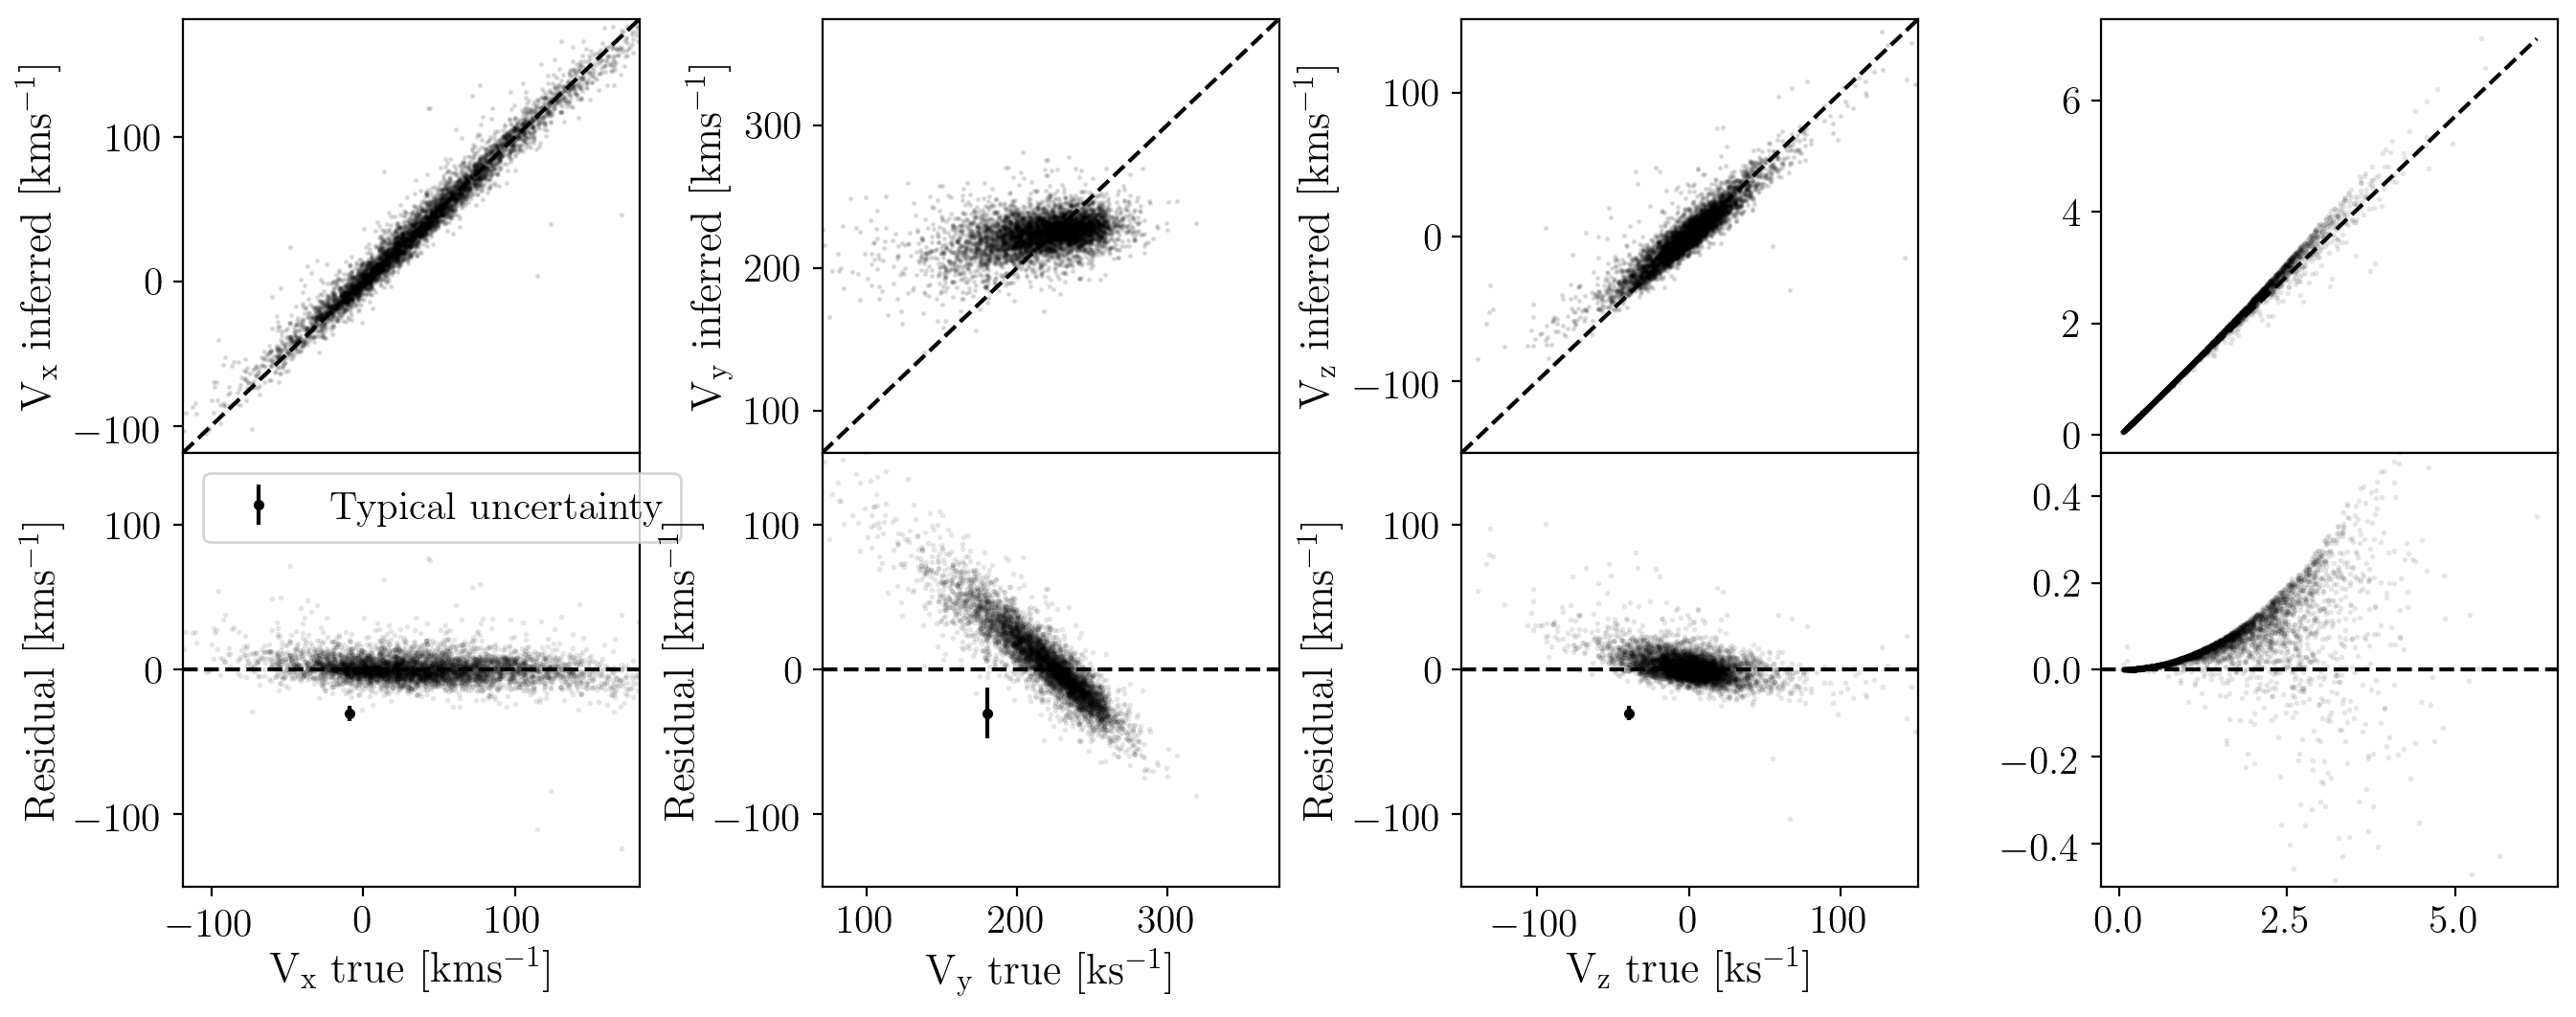

In [16]:
m = np.isfinite(adf.vx.values) & np.isfinite(adf.vy.values) & np.isfinite(adf.vz.values)
fig = resid_plot(adf.vx.values[m], adf.vy.values[m], adf.vz.values[m], adf.vx_inferred.values[m],
                 adf.vy_inferred.values[m], adf.vz_inferred.values[m], adf.vx_inferred_err.values[m],
                 adf.vy_inferred_err.values[m], adf.vz_inferred_err.values[m],
                 adf.r_est.values[m]*1e-3, np.exp(adf.lndistance_inferred.values[m]))

plt.tight_layout()
# plt.savefig("../plots/residuals")
# plt.savefig("../paper/residuals.pdf")

typical vz uncertainty =  5.0001025417474745 6.990067124966871


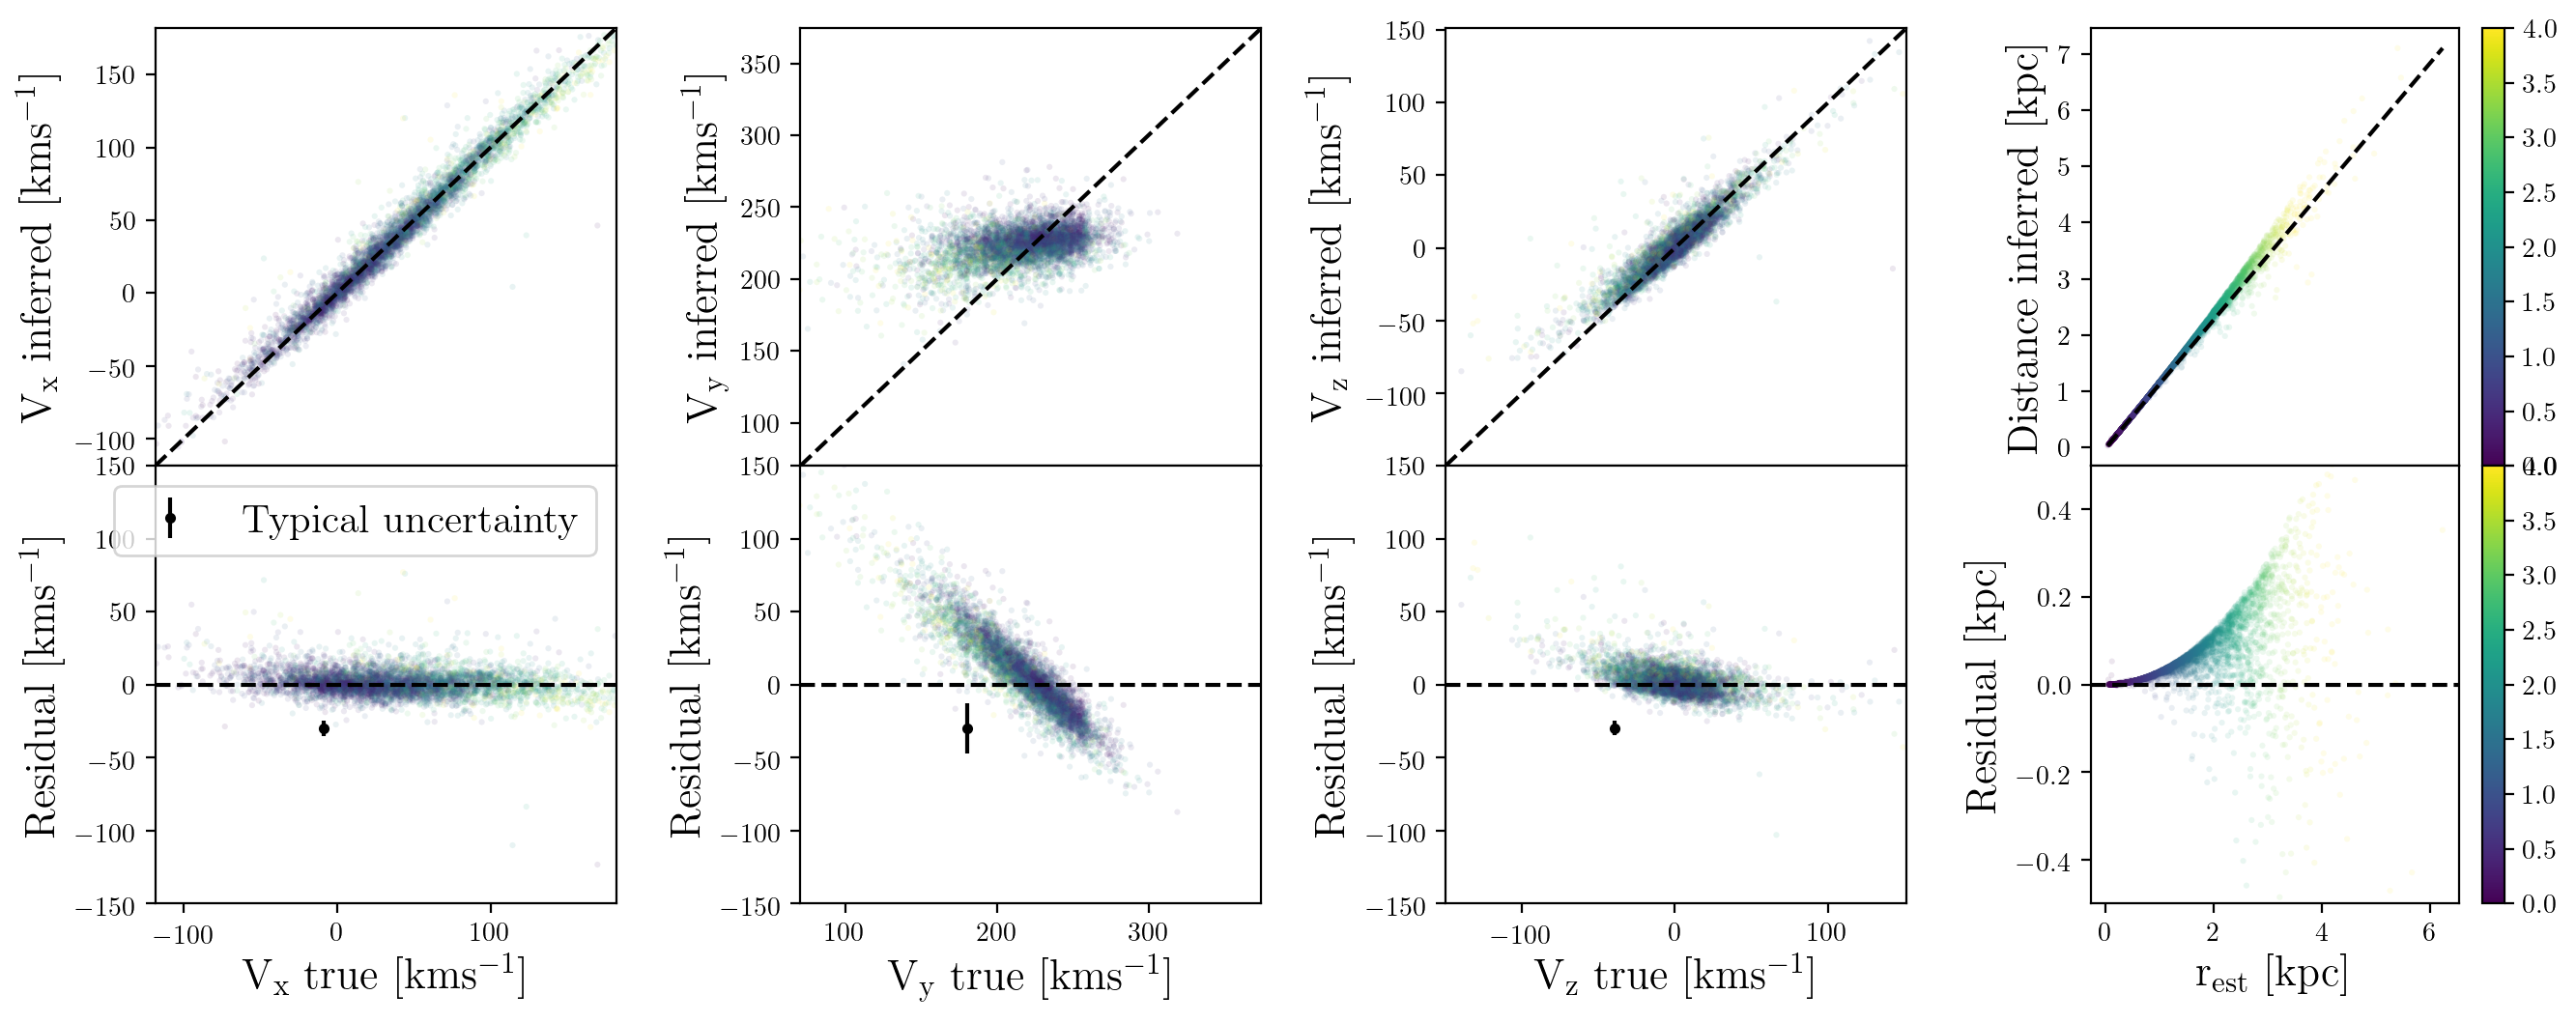

In [24]:
vx, vy, vz, vx_inferred, vy_inferred, vz_inferred, vx_inferred_err, vy_inferred_err, \
    vz_inferred_err, r_est, lndistance_inferred = adf.vx.values[m], adf.vy.values[m], adf.vz.values[m], \
    adf.vx_inferred.values[m], adf.vy_inferred.values[m], adf.vz_inferred.values[m], \
    adf.vx_inferred_err.values[m], adf.vy_inferred_err.values[m], adf.vz_inferred_err.values[m], \
    adf.r_est.values[m]*1e-3, np.exp(adf.lndistance_inferred.values[m])

vmin, vmax = 0, 4
ms, alpha, box_size = 5, .1, 150

fig = plt.figure(figsize=(16, 6), dpi=200)
gs = gridspec.GridSpec(2, 4, hspace=.0, wspace=.4, height_ratios=[1, 1])

ax0 = plt.subplot(gs[0, 0])
xlims = (np.median(vx) - box_size, np.median(vx_inferred) + box_size)
ax0.scatter(vx, vx_inferred, c=r_est, s=ms, alpha=alpha, edgecolor="none", rasterized=True, zorder=0, vmin=vmin, vmax=vmax)
xs = np.linspace(xlims[0], xlims[1], 100)
plt.plot(xs, xs, "k", ls="--", zorder=1)
ax0.set_ylim(xlims)
ax0.set_xlim(xlims)
ax0.set_ylabel("$\mathrm{V_x~inferred~[kms^{-1}]}$")
ax0.set_xticklabels([])

ax1 = plt.subplot(gs[0, 1])
ylims = (np.median(vy) - box_size, np.median(vy_inferred) + box_size)
ax1.scatter(vy, vy_inferred, c=r_est, s=ms, alpha=alpha, edgecolor="none", rasterized=True, zorder=0, vmin=vmin, vmax=vmax)
xs = np.linspace(ylims[0], ylims[1], 100)
plt.plot(xs, xs, "k", ls="--", zorder=1)
ax1.set_xlim(ylims)
ax1.set_ylim(ylims)
ax1.set_ylabel("$\mathrm{V_y~inferred~[kms^{-1}]}$")
ax1.set_xticklabels([])

ax2 = plt.subplot(gs[0, 2])
zlims = (np.median(vz) - box_size, np.median(vz_inferred) + box_size)
ax2.scatter(vz, vz_inferred, c=r_est, s=ms, alpha=alpha, edgecolor="none", rasterized=True, zorder=0, vmin=vmin, vmax=vmax)
xs = np.linspace(zlims[0], zlims[1], 100)
plt.plot(xs, xs, "k", ls="--", zorder=1)
ax2.set_xlim(zlims)
ax2.set_ylim(zlims)
ax2.set_ylabel("$\mathrm{V_z~inferred~[kms^{-1}]}$");
ax2.set_xticklabels([])

ax6 = plt.subplot(gs[0, 3])
cb = ax6.scatter(r_est, lndistance_inferred, c=r_est, s=ms, alpha=alpha, edgecolor="none", rasterized=True, zorder=0, vmin=vmin, vmax=vmax)
xs = np.linspace(min(lndistance_inferred), max(lndistance_inferred), 100)
ax6.plot(xs, xs, "k", ls="--", zorder=1)
ax6.set_ylabel("$\mathrm{Distance~inferred~[kpc]}$");
color_bar = plt.colorbar(cb)
color_bar.set_alpha(1)
color_bar.draw_all()

# Residual panels
# ---------------------------------------------------------------------------------------------------

ax3 = plt.subplot(gs[1, 0])
ax3.scatter(vx, vx_inferred - vx, c=r_est, s=ms, alpha=alpha, edgecolor="none", rasterized=True, zorder=0, vmin=vmin, vmax=vmax)
ax3.errorbar(np.median(vx - 40), -30, yerr=np.median(vx_inferred_err), fmt="k.", label="$\mathrm{Typical~uncertainty}$")
ax3.axhline(0, color="k", ls="--", zorder=1)
ax3.set_ylim(-box_size, box_size)
ax3.set_xlim(xlims)
ax3.set_xlabel("$\mathrm{V_x~true~[kms^{-1}]}$")
ax3.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")
ax3.legend()

ax4 = plt.subplot(gs[1, 1])
ax4.scatter(vy, vy_inferred - vy, c=r_est, s=ms, alpha=alpha, edgecolor="none", rasterized=True, zorder=0, vmin=vmin, vmax=vmax)
ax4.errorbar(np.median(vy - 40), -30, yerr=np.median(vy_inferred_err), fmt="k.")
ax4.axhline(0, color="k", ls="--", zorder=1)
ax4.set_ylim(-box_size, box_size)
ax4.set_xlim(ylims)
ax4.set_xlabel("$\mathrm{V_y~true~[kms^{-1}]}$")
ax4.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")

ax5 = plt.subplot(gs[1, 2])
ax5.scatter(vz, vz_inferred - vz, c=r_est, s=ms, alpha=alpha, edgecolor="none", rasterized=True, zorder=0, vmin=vmin, vmax=vmax)
ax5.errorbar(np.median(vz - 40), -30, yerr=np.median(vz_inferred_err), fmt="k.")
print("typical vz uncertainty = ", np.median(vz_inferred_err), np.median(vz_inferred_err/vz)*100)
ax5.axhline(0, color="k", ls="--", zorder=1)
ax5.set_ylim(-box_size, box_size)
ax5.set_xlim(zlims)
ax5.set_xlabel("$\mathrm{V_z~true~[kms^{-1}]}$")
ax5.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")

ax6 = plt.subplot(gs[1, 3])
cb = ax6.scatter(r_est, lndistance_inferred-r_est, c=r_est, s=ms, alpha=alpha, edgecolor="none", rasterized=True, zorder=0, vmin=vmin, vmax=vmax)
ax6.axhline(0, color="k", ls="--", zorder=1)
ax6.set_ylim(-.5, .5)
ax6.set_xlabel("$\mathrm{r_{est}~[kpc]}$")
ax6.set_ylabel("$\mathrm{Residual~[kpc]}$")

color_bar = plt.colorbar(cb)
color_bar.set_alpha(1)
color_bar.draw_all()